Basic (priliminary) exploratory analysis for dependence between reason and priority reasons & displacement between regions. Will be updated.

In [3]:
# Read data
import os
import pandas
os.chdir('/home/robin/Documents/Omdena/')
dataset = pandas.read_csv('1_Displacement_Data/UNHCR-PRMN-Displacement-Dataset.csv')
dataset_head = dataset.head()
print(dataset_head)

    Month End  Year Week Current (Arrival) Region Current (Arrival) District  \
0  31/01/2016     201601                    Awdal                     Borama   
1  31/01/2016     201601                    Awdal                     Borama   
2  31/01/2016     201602                    Awdal                     Borama   
3  31/01/2016     201604                    Awdal                     Borama   
4  31/01/2016     201604                    Awdal                     Borama   

  Previous (Departure) Region Previous (Departure) District           Reason  \
0                      Bakool                     Tayeeglow  Drought related   
1                     Banadir                       Banadir  Drought related   
2                     Banadir                       Banadir  Drought related   
3                     Banadir                       Banadir  Drought related   
4                     Banadir                       Banadir  Drought related   

  Current (Arrival) Priority Need  Num

In [4]:
dataset.columns = [var.replace(' ', '_') for var in dataset.columns]
dataset.columns = [var.replace('(', '') for var in dataset.columns]
dataset.columns = [var.replace(')', '') for var in dataset.columns]
dataset_head = dataset.head()
print(dataset_head)

    Month_End  Year_Week Current_Arrival_Region Current_Arrival_District  \
0  31/01/2016     201601                  Awdal                   Borama   
1  31/01/2016     201601                  Awdal                   Borama   
2  31/01/2016     201602                  Awdal                   Borama   
3  31/01/2016     201604                  Awdal                   Borama   
4  31/01/2016     201604                  Awdal                   Borama   

  Previous_Departure_Region Previous_Departure_District           Reason  \
0                    Bakool                   Tayeeglow  Drought related   
1                   Banadir                     Banadir  Drought related   
2                   Banadir                     Banadir  Drought related   
3                   Banadir                     Banadir  Drought related   
4                   Banadir                     Banadir  Drought related   

  Current_Arrival_Priority_Need  Number_of_Individuals  
0            Livelihood Suppo

In [5]:
# Find if there is relation between reason and arrival_priority_need
table1 = pandas.crosstab(index=dataset.Current_Arrival_Priority_Need,
                          columns=dataset.Reason) # Crosstab
print(table1)

Reason                         Conflict/Insecurity  Drought related  Flood  \
Current_Arrival_Priority_Need                                                
Food                                          3126             9192    352   
Health                                         299             1074     27   
Humanitarian Aid                               212              631     15   
Livelihood Support                            1512             6244    122   
Other                                          749              920     43   
Protection                                     515              158      2   
Shelter                                       1517             2117    159   
Transport                                       46              623      0   
Water                                          379             1773     34   

Reason                         Other  
Current_Arrival_Priority_Need         
Food                             953  
Health                  

In [27]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table1)
print(chi2, p)

2597.4301538921636 0.0


p-value significant

In [48]:
# Find extent of dependence between these two variables
confusion_matrix = table1
import numpy as np
def cramers_v(confusion_matrix, chi2):
    chi2
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return(np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1))))
cramers_v(table1, chi2)

0.15698195532879447

Cramer's V ranges between 0 and 1, 1 meaning both variables are inclusive (i.e. complete dependence)

If intention to go further in this direction, further analysis can be done in finding out which reason demands which priority need. 

In [6]:
# 
table2 = pandas.crosstab(index=dataset.Current_Arrival_Region,
                          columns=dataset.Previous_Departure_Region) # Crosstab

<function matplotlib.pyplot.show(*args, **kw)>

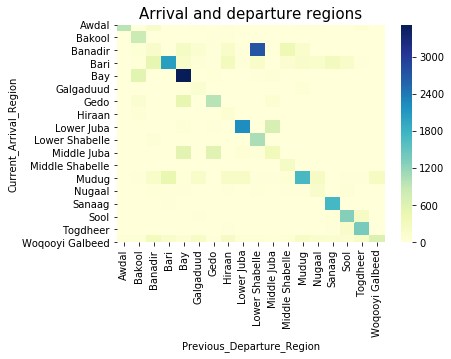

In [21]:
import seaborn as sns
plt.figure()
ax=sns.heatmap(table2, cmap="YlGnBu", cbar=True, annot = False);ax.axes.set_title("Arrival and departure regions",fontsize=15)
plt.show

For those regions that have more exchange of people due to displacements, we can find if they are geographically close to each other or displacement is also happening regardless of distance between regions.